In [2]:
using LinearAlgebra
using Distributions
using Plots
default(label="", margin=10Plots.pt)

In [3]:
# Beacon coordinates
β1 = [1., 1.]
β2 = [3., 1.];

In [4]:
# True position
pos_true = [-1., -1.]

2-element Vector{Float64}:
 -1.0
 -1.0

In [5]:
function measurements(pos, β1, β2)
    
    L  = norm(β1-β2,2)
    d1 = norm(pos-β1,2)
    d2 = norm(pos-β2,2)
    
    cosα1 = (d1^2 + L^2 - d2^2)./(2*d1*L)
    cosα2 = (d2^2 + L^2 - d1^2)./(2*d2*L)
    
    return acos(cosα1), acos(cosα2)
end

# Angle measurements
α1, α2 = measurements(pos_true, β1, β2)

(2.3561944901923453, 0.46364760900080615)

In [6]:
function triangulation(α1,α2,β1,β2)
    
    # Distance between beacons
    L  = norm(β1-β2,2)
    
#     # Distance to beacon line
#     d = L*sin(α1)*sin(α2) ./ sin(α1 + α2)
    
#     # Distance to individual beacons
#     d1 = d ./ sin(α1)
#     d2 = d ./ sin(α2)
    
#     # Polar to cartesian conversion with respect to beacon 1
#     x = β1[1] + d1*cos(α1)
#     y = β1[2] + d1*sin(-α1)
    
    x = β1[1] + L*cos(α1)*sin(α2)./ sin(α1 + α2)
    y = β1[2] + L*sin(-α1)*sin(α2)./ sin(α1 + α2)
    
    return x,y
end

pos_est = triangulation(α1, α2, β1, β2)

(-1.0000000000000036, -1.0000000000000018)

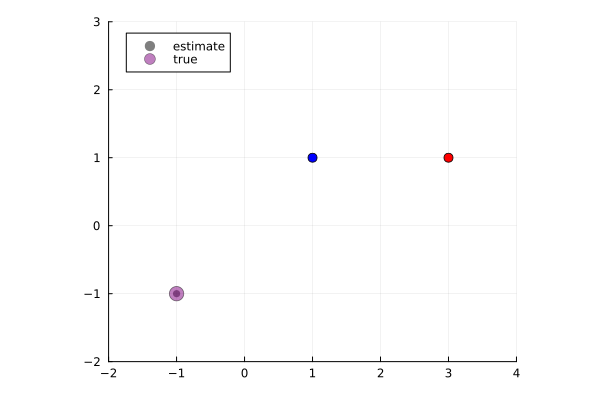

In [7]:
t = range(0.0, stop=2π, length=100)

plot(; ylims=[-2., 3.], xlims=[-1., 5.], aspect_ratio=:equal, legend=:topleft)
scatter!([β1[1]], [β1[2]], color="blue", markersize=5)
scatter!([β2[1]], [β2[2]], color="red", markersize=5)

scatter!([pos_est[1]], [pos_est[2]], label="estimate", color="black", alpha=0.5, markersize=4)

scatter!([pos_true[1]], [pos_true[2]], label="true", color="purple", alpha=0.5, markersize=8)